In [42]:
from scipy.signal import savgol_filter
from numpy.fft import fft, fftfreq
from siml.detect_peaks import *
import matplotlib.pyplot as plt
from sysdata.sim.csv_futures_sim_data import csvFuturesSimData
from paper.systems.simplesystem import simplesystem
import pandas as pd
import numpy as np
from seaborn import heatmap
import matplotlib.pyplot as plt
from sysquant.estimators.diversification_multipliers import diversification_mult_single_period
from sysquant.optimisation.weights import portfolioWeights
from syslogdiag.log_to_screen import logtoscreen
from syscore.fileutils import get_filename_for_package

log = logtoscreen('csvFuturesSimData')
log.set_logging_level('close eye')
# data = csvFuturesSimData()
data =  csvFuturesSimData(csv_data_paths=dict(
            csvFuturesAdjustedPricesData='ctse.data.adjusted_prices_csv',
            csvFuturesMultiplePricesData='ctse.data.multiple_prices_csv',
            csvFuturesInstrumentData='ctse.data.csvconfig'
    ), log=log)
system = simplesystem(
    data,
    'paper.systems.china.yaml')


2022-11-22 23:01:29 {'type': 'base_system', 'stage': 'config'}  Adding config defaults
Private configuration private/private_config.yaml does not exist; no problem if running in sim mode


<AxesSubplot: >

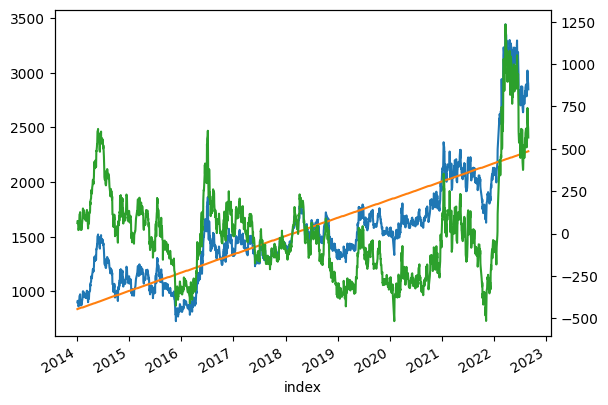

In [43]:
price = system.data.daily_prices('RM').dropna()
price.plot()
trend =  pd.Series(savgol_filter(price, len(price),1), index=price.index)
trend.plot()
detrended = price - trend
detrended.plot(secondary_y=True)

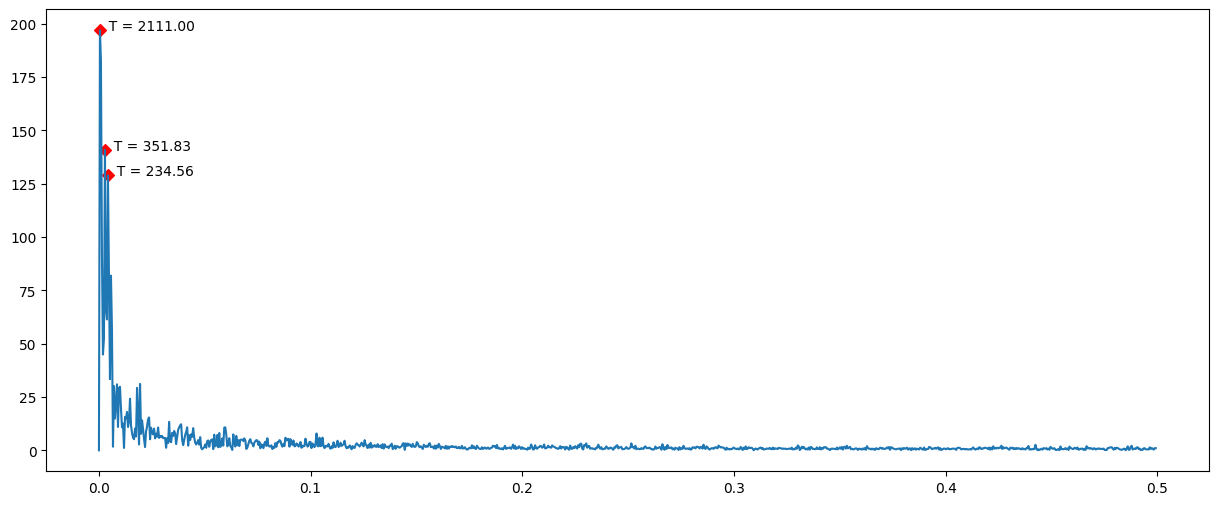

In [44]:
fft_y_  = fft(detrended) * 2.0 / len(detrended)
fft_y = np.abs(fft_y_[:len(fft_y_)//2])
indices_peaks = detect_peaks(fft_y, mph=100)

fft_x_ = fftfreq(len(detrended))
fft_x = fft_x_[:len(fft_x_)//2]
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(fft_x, fft_y)
ax.scatter(fft_x[indices_peaks], fft_y[indices_peaks], color='red',marker='D')
for idx in indices_peaks:
    x,y = fft_x[idx], fft_y[idx]
    text = "  T = {:.2f}".format(1/x)
    ax.annotate(text, (x,y))

<AxesSubplot: xlabel='x'>

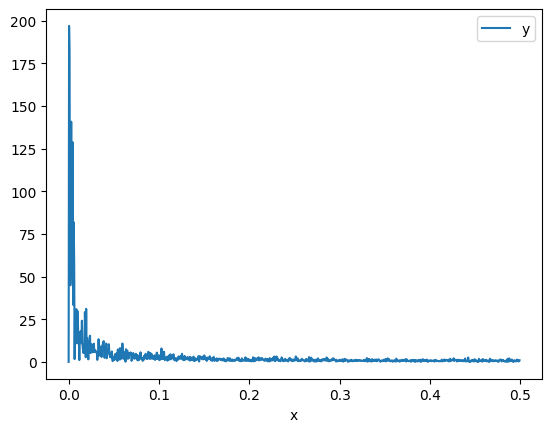

In [45]:
df = pd.DataFrame({
    'x': fft_x,
    'y': fft_y
})
# df = df[df['x'] > 1 / 100]
df.plot.line(x='x', y='y')